In [23]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold
# feature selection
from sklearn.feature_selection import RFE
# classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("D:/DS/zs/zs_data.csv")

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,28
Number of observations,30697
Total Missing (%),8.4%
Total size in memory,6.6 MiB
Average record size in memory,224.0 B
Numeric,14
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [49]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [51]:
df['shot_id_number'] = df.index + 1

In [52]:
df['shot_id_number'].isnull().any()

False

In [53]:
df.head(10)

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.0,0.000,NaN,34.0
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.0,0.000,112.2000,89.4
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.0,0.000,5.0000,22.0
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.0,0.000,12.0000,32.0
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.0,0.000,52.2000,NaN


In [54]:
df['knockout_match'].value_counts()

0.0    24921
1.0     4259
Name: knockout_match, dtype: int64

In [55]:
df['match_event_id'].value_counts().head()

2.0      128
4.0      102
11.0      92
278.0     88
8.0       87
Name: match_event_id, dtype: int64

In [56]:
df['power_of_shot'].value_counts()

3.0    7885
1.0    7659
4.0    6910
2.0    6399
5.0     314
6.0      37
7.0       7
Name: power_of_shot, dtype: int64

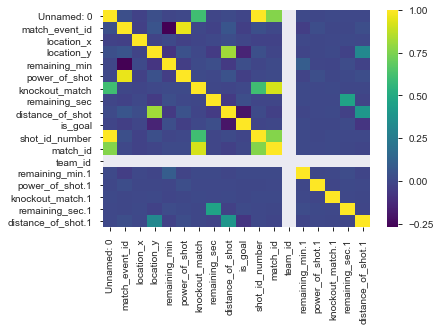

In [57]:
correlation = df.corr()
sns.heatmap(correlation, cmap = 'viridis')

In [58]:
correlation = df.corr()['is_goal']
# convert series to dataframe so it can be sorted
correlation_df = pd.DataFrame(correlation)
# correct column label from Points to correlation
correlation_df.columns = ["Correlation"]
# sort correlation
corr_sorted = correlation_df.sort_values(by=['Correlation'], ascending=False)
corr_sorted.head(20)

,Correlation
is_goal,1.000000
remaining_sec,0.028964
remaining_min,0.028342
remaining_sec.1,0.012209
remaining_min.1,0.008384
knockout_match,0.001152
match_id,-0.000169
knockout_match.1,-0.001224
power_of_shot.1,-0.001363
location_x,-0.004728


In [64]:
df2 = df.loc[df['is_goal'].isnull() == True]

In [68]:
df['is_goal'].isnull().sum()

6268

In [138]:
df1 = df.drop(df[df['is_goal'].isnull()].index)

In [139]:
df1.shape

(24429, 28)

In [140]:
df2.shape

(6268, 28)

In [141]:
df.shape

(30697, 28)

Hence,
* df is the amin dataset
* df1 is the df with non NULL is_goal values
* df2 is the df with NULL is_goal values

In [91]:
pandas_profiling.ProfileReport(df1)

Number of variables,29
Number of observations,24429
Total Missing (%),7.4%
Total size in memory,5.4 MiB
Average record size in memory,232.0 B
Numeric,13
Categorical,10
Boolean,1
Date,0
Text (Unique),0
Rejected,5


In [142]:
df1.isnull().any()

Unnamed: 0               False
match_event_id            True
location_x                True
location_y                True
remaining_min             True
power_of_shot             True
knockout_match            True
game_season               True
remaining_sec             True
distance_of_shot          True
is_goal                  False
area_of_shot              True
shot_basics               True
range_of_shot             True
team_name                 True
date_of_game              True
home/away                 True
shot_id_number           False
lat/lng                   True
type_of_shot              True
type_of_combined_shot     True
match_id                 False
team_id                  False
remaining_min.1           True
power_of_shot.1           True
knockout_match.1          True
remaining_sec.1           True
distance_of_shot.1        True
dtype: bool

In [143]:
df1 = df1.drop(['match_event_id', 'location_x', 'location_y', 'game_season', 'team_name', 'date_of_game', 'lat/lng', 'match_id', 'team_id'], axis = 1)

In [144]:
df1.head()

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,1,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,2,shot - 45,NaN,10.00,1.0,28.800,22.0000,35.0
2,2,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,3,shot - 25,NaN,92.64,1.0,0.000,63.7216,54.4
3,3,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,4,NaN,shot - 3,NaN,1.0,122.608,52.0000,42.0
4,4,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,5,NaN,shot - 1,42.64,2.0,0.000,19.0000,20.0
5,5,9.0,3.0,0.0,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,6,shot - 17,NaN,9.00,3.0,0.000,NaN,34.0


Catgorical Variables: 
* area_of_shot
* shot_basics
* home/away
* type_of_shot
* type_of_cobined_shot

Dropping knockout_match.1, remaining_min.1, power_of_shot.1 since they contain weird values

In [145]:
df1 = df1.drop(['knockout_match.1', 'power_of_shot.1', 'remaining_min.1'], axis = 1)

In [146]:
df1.head()

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_sec.1,distance_of_shot.1
1,1,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,2,shot - 45,NaN,22.0000,35.0
2,2,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,3,shot - 25,NaN,63.7216,54.4
3,3,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,4,NaN,shot - 3,52.0000,42.0
4,4,NaN,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,5,NaN,shot - 1,19.0000,20.0
5,5,9.0,3.0,0.0,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,6,shot - 17,NaN,NaN,34.0


In [147]:
df1['remaining_min'].value_counts()

0.0     2921
4.0     2176
2.0     2169
3.0     2127
1.0     2080
5.0     1968
6.0     1776
9.0     1696
7.0     1684
10.0    1612
8.0     1580
11.0    1396
Name: remaining_min, dtype: int64

In [148]:
df1['power_of_shot'].value_counts()

3.0    6306
1.0    6064
4.0    5482
2.0    5088
5.0     255
6.0      27
7.0       7
Name: power_of_shot, dtype: int64

In [149]:
df1['knockout_match'].value_counts()

0.0    19834
1.0     3383
Name: knockout_match, dtype: int64

In [150]:
df1['remaining_sec'].value_counts().head()

0.0     759
1.0     484
2.0     458
28.0    438
4.0     434
Name: remaining_sec, dtype: int64

In [151]:
df1['distance_of_shot'].value_counts()

20.0    4144
45.0    1463
44.0    1149
37.0    1118
36.0    1058
38.0    1053
39.0    1023
46.0     959
40.0     906
35.0     898
34.0     809
33.0     713
41.0     598
32.0     585
27.0     542
31.0     538
30.0     530
28.0     518
42.0     513
26.0     494
29.0     487
21.0     463
43.0     437
22.0     428
25.0     397
47.0     396
24.0     289
23.0     289
48.0     150
49.0      60
        ... 
78.0       4
75.0       3
67.0       3
68.0       3
82.0       3
70.0       3
94.0       3
53.0       3
76.0       3
55.0       3
79.0       2
84.0       2
65.0       2
87.0       2
66.0       2
72.0       2
88.0       2
90.0       2
71.0       2
69.0       2
74.0       1
81.0       1
89.0       1
80.0       1
91.0       1
77.0       1
97.0       1
85.0       1
99.0       1
73.0       1
Name: distance_of_shot, Length: 73, dtype: int64

In [152]:
df1['area_of_shot'].value_counts()

Center(C)                10177
Right Side Center(RC)     3616
Right Side(R)             3504
Left Side Center(LC)      3031
Left Side(L)              2848
Mid Ground(MG)              71
Name: area_of_shot, dtype: int64

In [153]:
df1['shot_basics'].value_counts()

Mid Range          9488
Goal Area          5323
Penalty Spot       4245
Goal Line          3515
Right Corner        302
Left Corner         216
Mid Ground Line      57
Name: shot_basics, dtype: int64

In [155]:
df1['range_of_shot'].value_counts()

Less Than 8 ft.    7064
16-24 ft.          6220
8-16 ft.           5076
24+ ft.            4751
Back Court Shot      70
Name: range_of_shot, dtype: int64

In [157]:
df1['home/away'].value_counts().head()

MANU @ SAS      767
MANU @ PHX      701
MANU vs. SAS    693
MANU @ SAC      686
MANU vs. PHX    650
Name: home/away, dtype: int64

In [179]:
df1['home/away'] = df1['home/away'].dropna()

In [184]:
df1['home/away'].isnull().count()

24429

In [182]:
df1['home/away'].shape

(24429,)

In [176]:
ha = np.asarray(df['home/away'])

In [177]:
np.unique(ha)

TypeError: '<' not supported between instances of 'str' and 'float'